In [1]:
import requests
from bs4 import BeautifulSoup as BS
import io
import numpy as np
from PIL import Image

In [2]:
from capt import captcha_recognize

Using Theano backend.


In [3]:
import time
from IPython.display import display

In [66]:
url_home = 'http://gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do' 

In [67]:
session = requests.session()

In [68]:
res = session.get('http://gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do')

In [69]:
captcha_res = session.get('http://gcis.nat.gov.tw/pub/kaptcha.jpg')

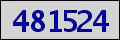

In [70]:
Image.open(io.BytesIO(captcha_res.content))

In [71]:
img_code = '481524'#'933885'
query = 'method=query&otherEnterFlag=false&useEUC=N&isShowEUC=Y&queryKey=&selCmpyType=1&selQueryType=1&queryStr=%B7L%ACP&brBanNo=&imageCode={0}'.format(img_code)
query

'method=query&otherEnterFlag=false&useEUC=N&isShowEUC=Y&queryKey=&selCmpyType=1&selQueryType=1&queryStr=%B7L%ACP&brBanNo=&imageCode=481524'

In [72]:
payload = {'method':'query',
'otherEnterFlag':'false',
'useEUC':'N',
'isShowEUC':'Y',
'queryKey':'',
'selCmpyType':'1',
'selQueryType':'1',
'queryStr':'微星',
'brBanNo':'',
'imageCode':img_code}

In [73]:
#url_post = 'http://gcis.nat.gov.tw/pub/cmpy/cmpyInfoListAction.do?'
res_search = session.get(url_post, data=payload)#+query)

In [74]:
res_search.encoding='big5'

In [75]:
BS(res_search.text, 'lxml')

<html>
<head>
<meta content="公司及分公司基本資料查詢" name="DC.Title"/>
<meta content="" name="DC.Creator"/>
<meta content="" name="DC.Subject"/>
<meta content="" name="DC.Description"/>
<meta content="" name="DC.Contributor"/>
<meta content="網頁" name="DC.Type"/>
<meta content="Microsoft Internet Explorer" name="DC.Format"/>
<meta content="" name="DC.Source"/>
<meta content="繁體中文" name="DC.Language"/>
<meta content="" name="DC.Coverage"/>
<meta content="經濟部" name="DC.Publisher"/>
<meta content="2008-05-13" name="DC.Date"/>
<meta content="URL" name="DC.Identifier"/>
<meta content="" name="DC.Relation"/>
<meta content="" name="DC.Rights"/>
<meta content="500" name="Category.Theme"/>
<meta content="700" name="Category.Cake"/>
<meta content="620" name="Category.Service"/>
<meta content="財政經濟, 經濟貿易, 公司設立" name="Keywords"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>公司及分公司基本資料查詢</title>
<link href="/pub/css/pub.css" rel="Stylesheet" type="text/css"/>
<style type="text/c

In [9]:
img_arr = np.asarray(Image.open(io.BytesIO(captcha_res.content)))

In [10]:
img_arr.shape

(40, 120, 3)

In [25]:
st_index = 10
next_index = st_index+17
im = Image.fromarray(img_arr[5:36,st_index-3:next_index+3]).resize((32,30),Image.BILINEAR)
im_arr = np.asarray(im).reshape(1 ,3 ,32 ,30).astype('float32')/255

In [31]:
im

In [11]:
capt_rec = captcha_recognize()

In [12]:
capt_rec.load_model()

In [27]:
ans_arr = capt_rec.model.predict(im_arr)

In [30]:
capt_rec.lable[ans_arr.argmax()]

'S'

In [52]:
for i in range(30):
    captcha_res = session.get('http://gcis.nat.gov.tw/pub/kaptcha.jpg')
    img_arr = np.asarray(Image.open(io.BytesIO(captcha_res.content)))
    st_index = 10
    for i in range(6):
        next_index = st_index+17
        display(Image.fromarray(img_arr[5:36,st_index-3:next_index+3]))
        st_index = next_index
    time.sleep(0.5)

In [55]:
st_index = 10
for i in range(6):
    next_index = st_index+17
    display(img_arr[5:35,st_index-3:next_index+3].shape)
    display(Image.fromarray(img_arr[5:35,st_index-3:next_index+3]))
    st_index = next_index

(30, 23, 3)

(30, 23, 3)

(30, 23, 3)

(30, 23, 3)

(30, 23, 3)

(30, 23, 3)

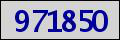

In [49]:
Image.fromarray(img_arr)

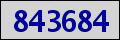

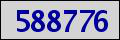

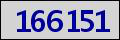

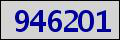

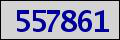

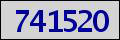

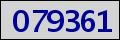

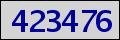

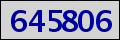

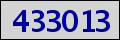

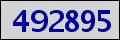

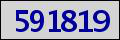

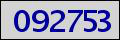

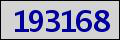

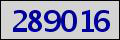

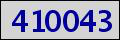

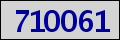

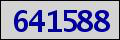

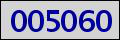

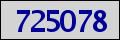

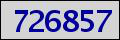

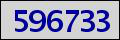

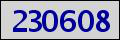

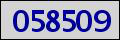

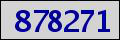

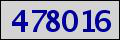

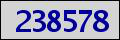

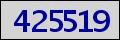

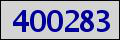

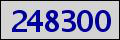

In [17]:
for i in range(30):
    captcha_res = session.get('http://gcis.nat.gov.tw/pub/kaptcha.jpg')
    display(Image.open(io.BytesIO(captcha_res.content)))
    
    time.sleep(0.5)

In [6]:
BS(res.text,'lxml')

<html>
<head>
<meta content="公司及分公司基本資料查詢" name="DC.Title"/>
<meta content="" name="DC.Creator"/>
<meta content="" name="DC.Subject"/>
<meta content="" name="DC.Description"/>
<meta content="" name="DC.Contributor"/>
<meta content="網頁" name="DC.Type"/>
<meta content="Microsoft Internet Explorer" name="DC.Format"/>
<meta content="" name="DC.Source"/>
<meta content="繁體中文" name="DC.Language"/>
<meta content="" name="DC.Coverage"/>
<meta content="經濟部" name="DC.Publisher"/>
<meta content="2008-05-13" name="DC.Date"/>
<meta content="URL" name="DC.Identifier"/>
<meta content="" name="DC.Relation"/>
<meta content="" name="DC.Rights"/>
<meta content="500" name="Category.Theme"/>
<meta content="700" name="Category.Cake"/>
<meta content="620" name="Category.Service"/>
<meta content="財政經濟, 經濟貿易, 公司設立" name="Keywords"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>公司及分公司基本資料查詢</title>
<link href="/pub/css/pub.css;jsessionid=83C2E2CFA75E847C7455D63BDE72008B" rel="Style

In [ ]:
session.post

In [ ]:
session